In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns; sns.set()
import warnings; warnings.filterwarnings("ignore")

In [0]:
raw_csv_data = pd.read_csv("IndexE8.csv")
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)
df_comp.set_index("date", inplace=True)
df_comp = df_comp.asfreq("b")
df_comp = df_comp.fillna(method="ffill")

In [0]:
df_comp["market_value"] = df_comp.spx

In [0]:
del df_comp["spx"], df_comp["dax"], df_comp["ftse"], df_comp["nikkei"]
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

# White Noise

In [0]:
wn = np.random.normal(loc=df.market_value.mean(), scale=df.market_value.std(), size=len(df))

In [0]:
df["wn"] = wn

In [37]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1088.945153
std,292.559287,292.467010
min,438.920000,71.826738
25%,914.620000,890.375470
50%,1144.650000,1091.432351
75%,1316.280729,1287.454277
max,1570.252238,2044.845781


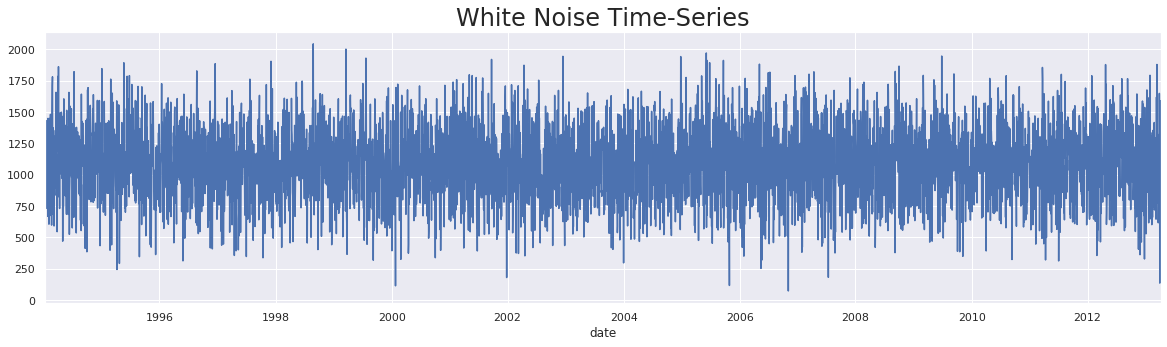

In [38]:
df.wn.plot(figsize=(20, 5))
plt.title("White Noise Time-Series", size=24)
plt.show()

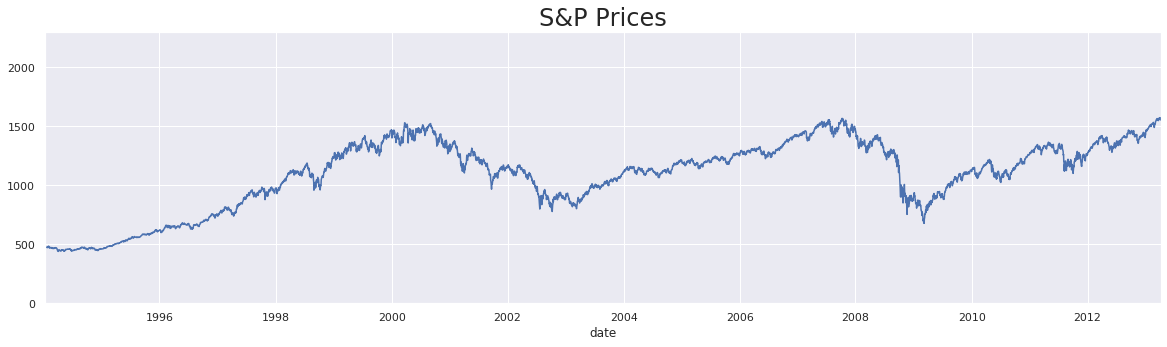

In [39]:
df.market_value.plot(figsize=(20, 5))
plt.title("S&P Prices", size=24)
plt.ylim(0, 2300)
plt.show()

# Random Walk

In [0]:
rw = pd.read_csv("RandWalk.csv")
rw.date = pd.to_datetime(rw.date, dayfirst=True)
rw.set_index("date", inplace=True)
rw = rw.asfreq("b")

In [41]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [0]:
df["rw"] = rw.price

In [43]:
df.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,1034.521088,1122.139662
1994-01-10,475.27,915.152974,1080.347860
1994-01-11,474.13,1045.936420,1082.095245
1994-01-12,474.17,1414.653391,1083.639265
1994-01-13,472.47,791.750152,1067.146255


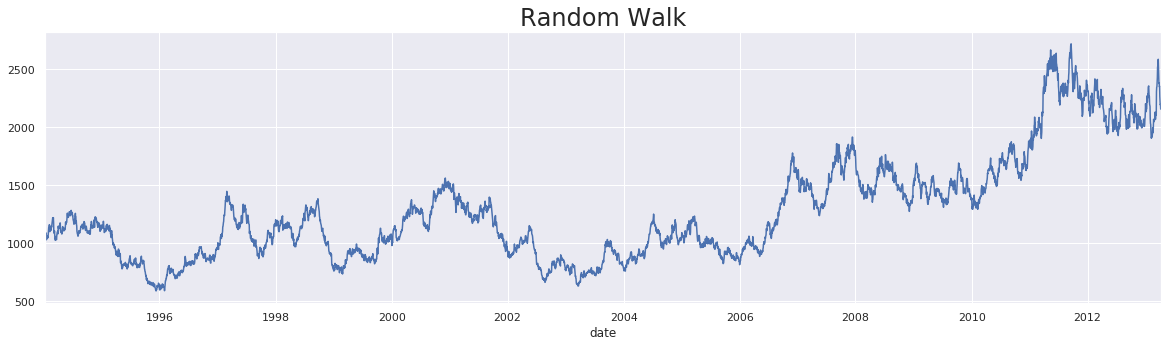

In [44]:
df.rw.plot(figsize=(20, 5))
plt.title("Random Walk", size=24)
plt.show()

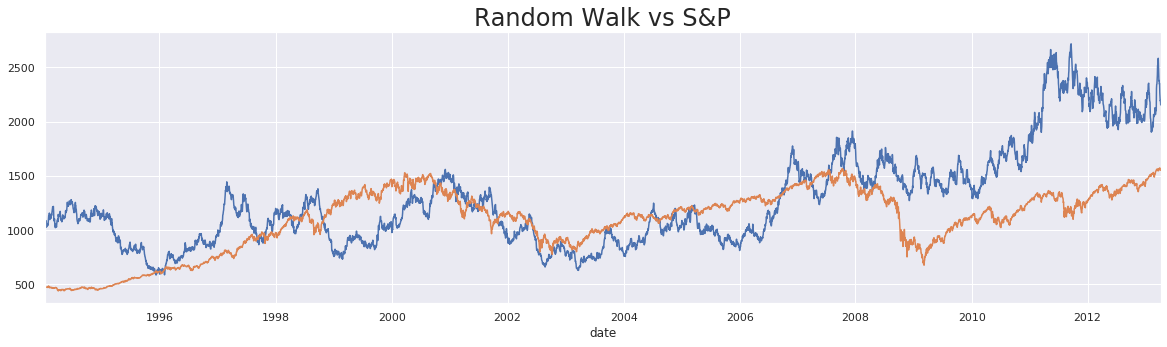

In [45]:
df.rw.plot(figsize=(20, 5))
df.market_value.plot(figsize=(20, 5))
plt.title("Random Walk vs S&P", size=24)
plt.show()

# Seasonality

In [46]:
sts.adfuller(df.market_value)

(-1.736984745235244,
 0.41216456967706194,
 18,
 5002,
 {'1%': -3.431658008603046,
  '10%': -2.567077669247375,
  '5%': -2.862117998412982},
 39904.880607487445)

In [47]:
sts.adfuller(df.wn)

(-70.45647713371048,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '10%': -2.5670765656497516,
  '5%': -2.8621159253018247},
 70809.79746614353)

In [48]:
sts.adfuller(df.rw)

(-1.3286073927689708,
 0.6159849181617388,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '10%': -2.567078038881065,
  '5%': -2.8621186927706463},
 46299.333497595144)

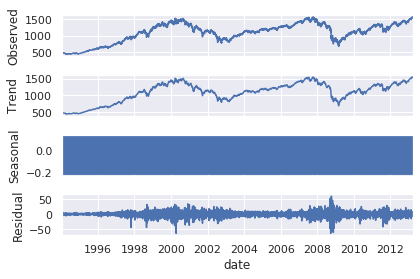

In [49]:
s_dec_additive = seasonal_decompose(df.market_value, model = "additive")
s_dec_additive.plot()
plt.show()

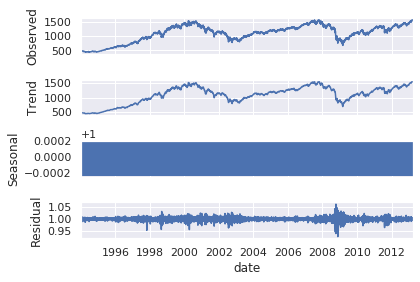

In [50]:
s_dec_multiplicative = seasonal_decompose(df.market_value, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

# ACF

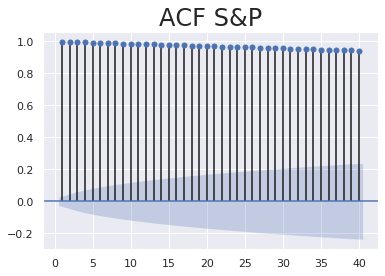

In [51]:
sgt.plot_acf(df.market_value, lags = 40, zero = False)
plt.title("ACF S&P", size = 24)
plt.show()

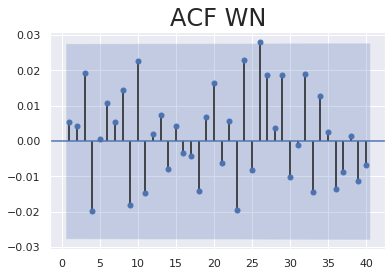

In [52]:
sgt.plot_acf(df.wn, lags = 40, zero = False)
plt.title("ACF WN", size = 24)
plt.show()

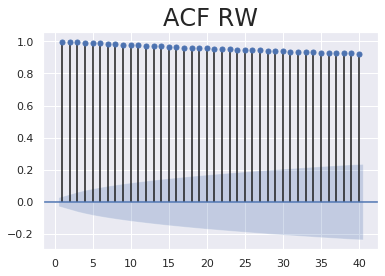

In [53]:
sgt.plot_acf(df.rw, lags = 40, zero = False)
plt.title("ACF RW", size = 24)
plt.show()

# PACF

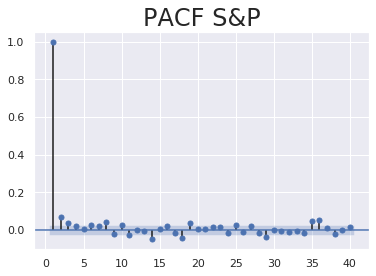

In [54]:
sgt.plot_pacf(df.market_value, lags = 40, zero = False, method=("ols"))
plt.title("PACF S&P", size = 24)
plt.show()

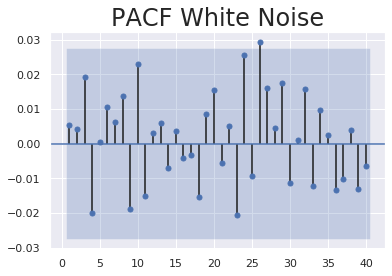

In [55]:
sgt.plot_pacf(df.wn, lags = 40, zero = False, method=("ols"))
plt.title("PACF White Noise", size = 24)
plt.show()

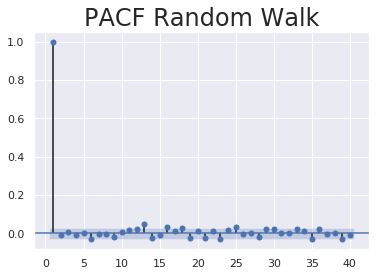

In [56]:
sgt.plot_pacf(df.rw, lags = 40, zero = False, method=("ols"))
plt.title("PACF Random Walk", size = 24)
plt.show()